In [1]:
from aruudy.poetry import prosody   # not prosody
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import re  # to remove # and the space beside it

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
             




mydata=pd.read_csv('C://Users//TheGhost//Desktop//STP//Qualifications//data//train.csv', encoding='utf8')  # utf8 delete or no


mydat_list= mydata['data'].values.tolist()
new_list=[]

# to remove # and the space beside it
for i in mydat_list :
    i=re.sub(r'[^\w\s]', '' ,i)
    i=re.sub(' +', ' ', i)
    new_list.append(i)
    
new_list

#Convert each line of the poem into a pattern
pattern=[]
newtext=[]
for j in new_list :
        shatr = prosody.process_shatr(j)
        WSpattern=shatr.ameter
        gg =shatr.prosody
        pattern.append(WSpattern)   # ليست فيها كل بيت متحول ل باترن 
        newtext.append(gg)

list_w=[]
list_s=[]

for c in pattern:
        j=c[0:11]
        w=j.count('w')
        s=j.count('s')
        list_w.append(w)
        list_s.append(s)

ll=mydata
ll['number_of_w'] = list_w
ll['number_of_s'] = list_s
del ll["data"]
ll.head(20)


u-u-u-u-u-------u-
u------u----u---u-
u------u----u-
--u-u----u--u---
---u------u-u-----
u-------u-u----
-----uu----
u----u-u--u--u--
u--u---u-u-
---u--u--u---u---
--u--u------u-u---u-
u------u-u-u------
u-----u---u-u---u-u--
--u----------u-
u----u--u---
u-u------------u-
---u-------u--
-----u-------u-
----u------u-
------u------
u------u--u----
---u-u-u---u---
-u-----u----u--
u-----------u-
u-u---u----u--
------------
u--u-u----u-----
---u-u-u------
-u--u--u----------
-u-----u-u-u-
-u-----u-----
u-u--u--------
------------
----u--------
-u--u----u-----
s--u------u---
--u------u-uu-----
u--u-u-u--u-----u-
------u------u--
--u----u--u---u--
-------u-u-----
-u--u-u---------
-------u-u----
-u-----u-u---
------u-----u--u--
u------u-u--u-
-u---------u-
u---u--------u--
u---uuu-u-----u-
u---u---u-u---u--
-u--------u----
----u-u-u-u-u-
-u--u-u-----u---
------u--u-----
u--u----u--u----u---
---u----------
-u---u-------u-
---u-uu-----
------u-u-------
----u-u-----u---
------u--u-
u----u--u--u---

,labels,number_of_w,number_of_s
0,8,8,3
1,10,6,5
2,11,6,5
3,9,7,4
4,8,6,5
5,8,6,5
6,7,6,5
7,11,7,4
8,6,7,4
9,13,6,5


In [2]:
#splitting inputs and oytputs 

X = ll[ll.columns[1:]].values   # or x=ll.iloc[: , :-1]
Y = ll.labels.values 

#scaling if nedded
#Rescaling data - Normalization
#a=(a-a.mean())/a.std()
#a  # dataframe
#It is prefrable to make scaling using sklearn MinMaxscaler (gives high accuracy)
from sklearn.preprocessing import MinMaxScaler ,Normalizer
scale  = MinMaxScaler()
scale.fit(X)
X= scale.transform(X)
#we only scale inputs (because o/p is small anyway)





In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

#lass sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0,
#fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
#max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

model = LogisticRegression(penalty='l1' ,solver = 'liblinear',random_state= 10,C=1 ,max_iter = 10000)
#change in solver and itration

logistic_fit = model.fit(X_train, y_train)
#print(y_test)
predictions = logistic_fit.predict(X_test)
#print(predictions) 


#from sklearn.metrics import classification_report
#print(classification_report(y_test,predictions)) 


#Evaluating the model

print('Accuracy score: ', format(accuracy_score(y_test, predictions )))

# 0.133
#0.14125  #penalty='l1' ,solver = 'liblinear',random_state=33,C=1 ,max_iter = 10000

Accuracy score:  0.139


confusion matrix 
 [[  0   0 109   0   0   0   0 296   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0 243   0   0   0   0   0   0]
 [  0   0 223   0   0   0   0 167   0   0   0   0   0   0]
 [  0   0   5   0   0   0   0  18   0   0   0   0   0   0]
 [  0   0 118   0   0   0   0 182   0   0   0   0   0   0]
 [  0   0   9   0   0   0   0  35   0   0   0   0   0   0]
 [  0   0  36   0   0   0   0  53   0   0   0   0   0   0]
 [  0   0  67   0   0   0   0 333   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0 257   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0 232   0   0   0   0   0   0]
 [  0   0 190   0   0   0   0 194   0   0   0   0   0   0]
 [  0   0 207   0   0   0   0 172   0   0   0   0   0   0]
 [  0   0  14   0   0   0   0  17   0   0   0   0   0   0]
 [  0   0 152   0   0   0   0 268   0   0   0   0   0   0]]


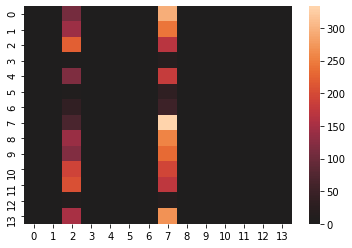

In [4]:
#Confusion Matrix
# TP FP 
# FN TN
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test , predictions)
print('confusion matrix \n',  conf)

#DRAWING CONFUSION MATRIX
# drawing confusion matrix

import seaborn as sns
sns.heatmap(conf, center = True)
plt.show()

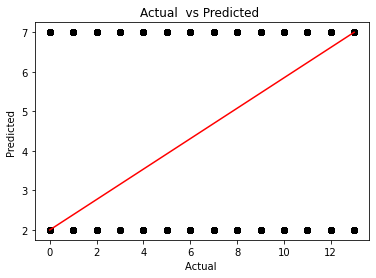

In [5]:
%matplotlib inline
#this preceding Line is needed to dispLay a pLot inline on Windows 
#pLot the tests and predictions 
plt.scatter(y_test, predictions, color='black') 
#draw a Line through the middLe showing the fit
x0 = min(y_test)
x1 = max(y_test) 
y0 = min(predictions)
y1 = max(predictions)
plt.plot([x0,x1],[y0,y1], color="red") 
#add LabeLs 
plt.xlabel("Actual ") 
plt.ylabel("Predicted ")
plt.title("Actual  vs Predicted ") 
plt.show() 


In [6]:
#other methods that represent accuracy

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
#---------------------------------------------
#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

#----------------------------------------------------
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#----------------------------------------------------
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

#----------------------------------------------------
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

#----------------------------------------------------
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

#----------------------------------------------------
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

#----------------------------------------------------
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

#----------------------------------------------------
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

#----------------------------------------------------
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

NameError: name 'y_pred' is not defined

In [ ]:
#If a coulom (feature) has 2 or 3 : 10] classes but in str form 
# This method will turn them into an integer for each class

df=mydata
del df['data']
df['new_data_patterned'] = o
df.head()


from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a label (category) encoder object
le = LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df['new_data_patterned'])


print('classed found : ' , list(le.classes_))
print('equivilant numbers are : ' ,le.transform(df['new_data_patterned']) )
df['new_data_patterned'] = le.transform(df['new_data_patterned'])
#print('Inverse Transform  : ' ,list(le.inverse_transform([9])))

